In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pprint
import os, sys
from collections import defaultdict
import pandas as pd
import seaborn as sns

In [2]:
output_fig_dir = "..\\figs\\"
if not os.path.isdir(output_fig_dir):
    os.mkdir(output_fig_dir)

In [3]:
# log_file_list = ["..\\logs\\demand_pinning_sweep_topo\\2022_6_20_10_49_38_511\\random_regular_graphs_DemandPinning.txt",
#                  "..\\logs\\demand_pinning_sweep_topo\\2022_6_20_1_57_41_870\\random_regular_graphs_DemandPinning.txt"]
log_file_list = ["..\\logs\\demand_pinning_sweep_topo\\2022_6_21_9_45_46_58\\small_word_graphs_DemandPinning.txt"]
num_nodes_to_radix_to_gap = defaultdict(dict)

In [ ]:
data_pd_dictionary = {"seed": [], "thresh": [], "gap": [], "radix": [], "nodes": [], "diameter": [], "aspl": []}
link_cap = 5000
seed = 0
for log_file in log_file_list:
    with open(log_file, "r") as fp:
        for fline in fp.readlines():
            if fline.startswith("#"):
                continue
            print(fline)
            numNodes, radix, numPaths, thresh, diameter, aspl, opt, heuristic, gap = fline.split(",")
            gap = float(gap)
            thresh = float(thresh)
            seed = int(seed)
            # numNodes = int(numNodes)
            radix = int(radix)
            numPaths = int(numPaths)
            norm_gap = gap * 100 / (radix * int(numNodes) * link_cap)
            data_pd_dictionary["seed"].append(seed)
            data_pd_dictionary["gap"].append(norm_gap)
            data_pd_dictionary["thresh"].append(thresh)
            data_pd_dictionary["diameter"].append(diameter)
            data_pd_dictionary["aspl"].append(aspl)
            data_pd_dictionary["radix"].append(radix)
            data_pd_dictionary["nodes"].append(numNodes)

In [5]:
data_df = pd.DataFrame(data_pd_dictionary)
data_df

,seed,thresh,gap,radix,nodes,diameter,aspl
0,0,250.0,30.000000,2,9,5,3.5
1,0,250.0,4.861111,4,9,3,2.5
2,0,250.0,2.037037,6,9,3,2.25
3,0,250.0,0.347222,8,9,2,2
4,0,250.0,50.000000,2,11,6,4
5,0,250.0,10.000000,4,11,4,2.8
6,0,250.0,2.500000,6,11,3,2.4
7,0,250.0,1.136364,8,11,3,2.2
8,0,250.0,75.000000,2,13,7,4.5
9,0,250.0,9.326923,4,13,4,3


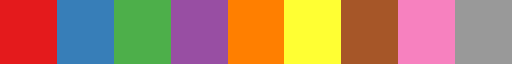

In [6]:
color_pallette = plt.get_cmap("Set1")
color_pallette

In [7]:
dash_list = sns._core.unique_dashes(data_df["nodes"].unique().size+1)
dash_list

['', (4, 1.5), (1, 1), (3, 1.25, 1.5, 1.25)]

In [8]:
# colors = [color_pallette(3), color_pallette(0), color_pallette(4), color_pallette(2)]
# colors = [color_pallette(1), color_pallette(2), color_pallette(3), color_pallette(4)]
# colors = [color_pallette(1), color_pallette(3), color_pallette(2), color_pallette(0), color_pallette(4)]
colors = [color_pallette(1), color_pallette(3), color_pallette(2)]
style_col = "nodes"
line_styles = {key:value for key,value in zip(data_df[style_col].unique(), dash_list[1:])}
marker_styles = ["P", "X", "o"]

inf


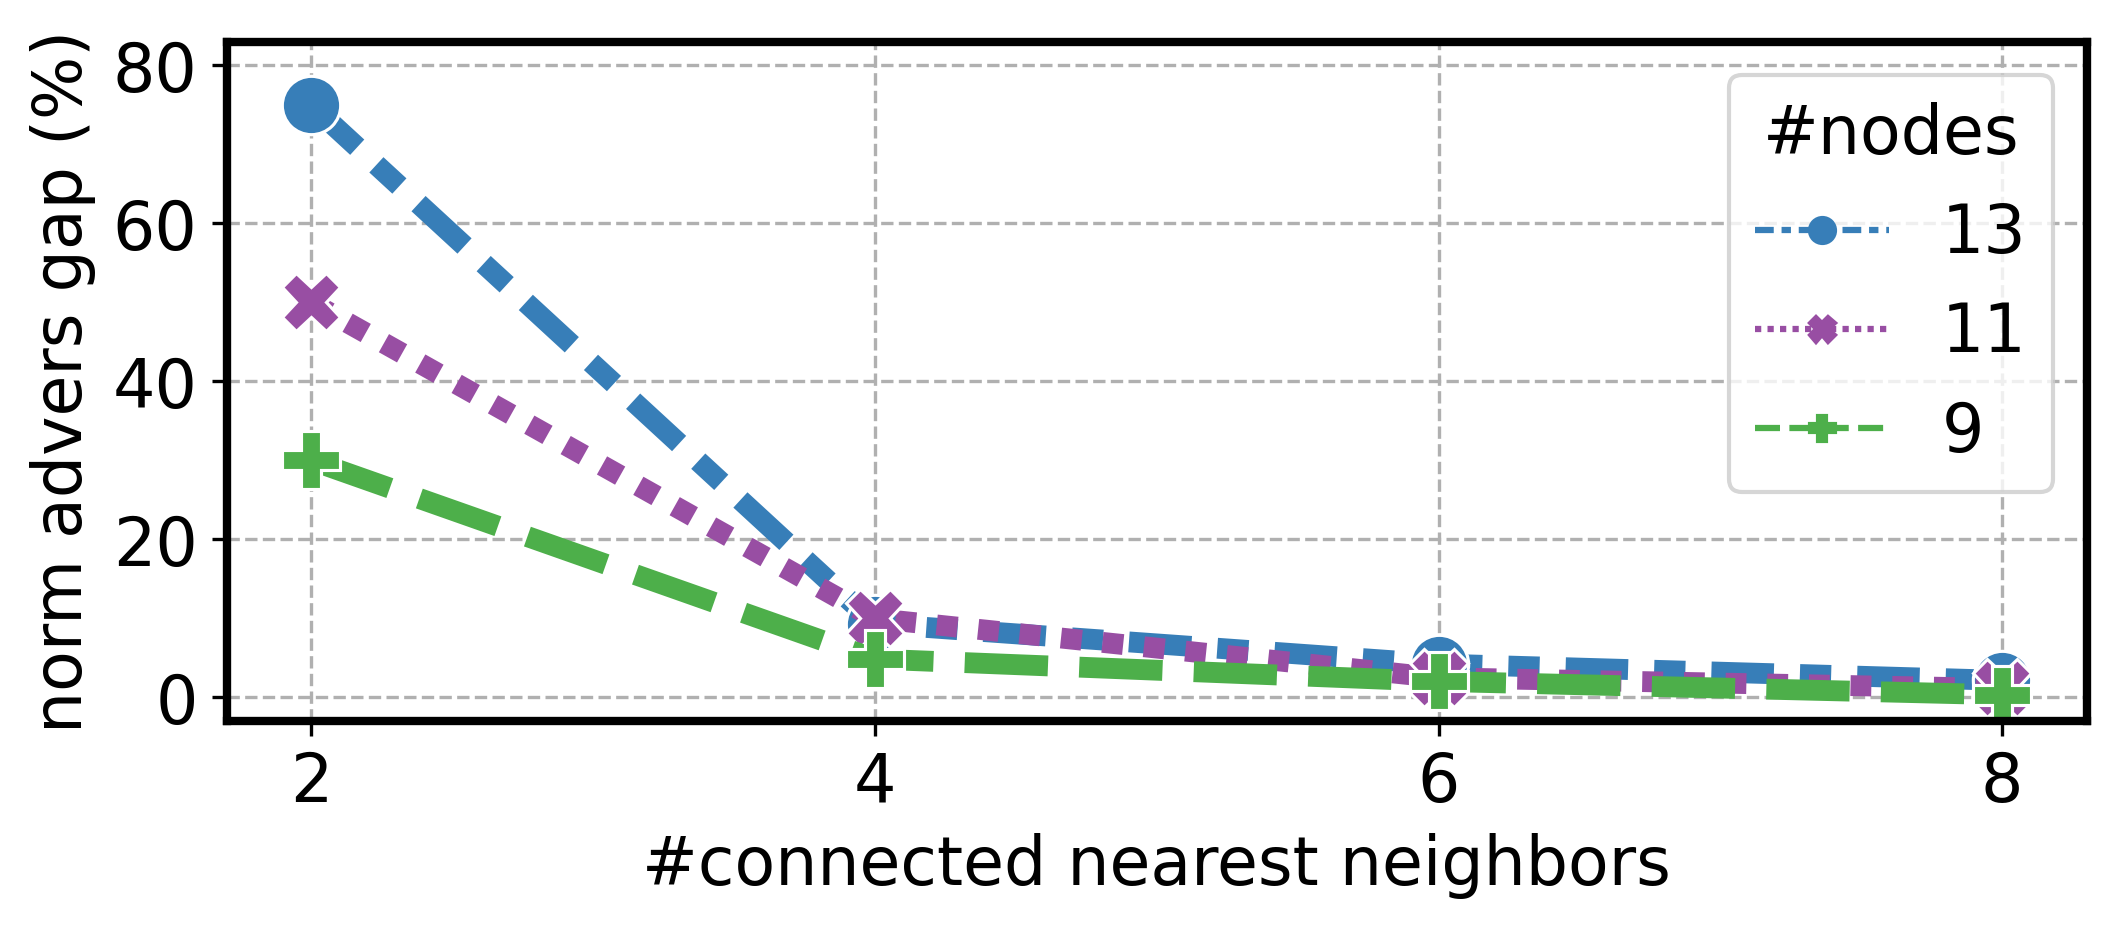

In [15]:
plt.rc('axes', linewidth=2)
plt.figure(figsize=(8, 3), dpi=300)
x_min = np.Inf
sns.lineplot(x="radix", y="gap",
             hue="nodes", data=data_df, 
             palette=colors,
             markers=marker_styles, 
             style="nodes",
             dashes=line_styles,
             linewidth=5,
             ms=14,
             hue_order=["13", "11", "9"]
            #  mfc="white"
             )

# plt.legend(fontsize=16, loc="upper left")
# plt.title("Pop2 + 2-shortest paths on B4", fontsize=16)
plt.xlabel("#connected nearest neighbors", fontsize=16)
plt.ylabel("norm advers gap (%)", fontsize=16)
# plt.xscale('log')
# plt.yticks(np.arange(0.25, 0.47, 0.03), fontsize=14)
plt.yticks([0, 20, 40, 60, 80], fontsize=16)
plt.xticks([2, 4, 6, 8], fontsize=16)
plt.ylim([-3, 83])
# plt.ylim([0, 46])
plt.grid(which="major", zorder=-1, linestyle="--")
plt.legend(title="#nodes", fontsize=16, loc="upper right", title_fontsize="16")
plt.savefig(output_fig_dir + "demand_pinning_sweep_topo.jpg", bbox_inches="tight", format="jpg", dpi=300)
plt.savefig(output_fig_dir + "demand_pinning_sweep_topo.pdf", bbox_inches="tight", format="pdf", dpi=300)
print(x_min)